In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [2]:
img_files = os.listdir("img")
xml_files = list(map(lambda x: x.replace(".png", ".xml"), img_files))
txt_files = list(map(lambda x: x.replace(".png", ".txt"), img_files))

print(f"{img_files}\n{xml_files}\n{txt_files}")

['D_2.png', 'D_3.png', 'D_5.png']
['D_2.xml', 'D_3.xml', 'D_5.xml']
['D_2.txt', 'D_3.txt', 'D_5.txt']


In [3]:
def visualize_voc_annotations(image_path, annotation_path):
    # Load the image
    image = cv2.imread(image_path)

    # Parse the XML annotation file
    tree = ET.parse(annotation_path)
    root = tree.getroot()

    # Iterate over the objects in the XML
    for object_element in root.findall('object'):
        label = object_element.find('name').text
        bbox = object_element.find('bndbox')

        # Extract bounding box coordinates
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        # Draw the bounding box on the image
        color = (255, 0, 0)  # Red color
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 4)

        # Add the label to the image
        cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, color, 4)

    return image

In [4]:
def visualize_yolo_annotations(image_path, annotation_path, class_file="classes.txt"):
    # Load the image
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # Read YOLO annotations
    with open(annotation_path, "r") as f:
        lines = f.readlines()

    # Read class labels
    with open(class_file, "r") as f:
        class_names = f.readlines()

    class_names = list(map(lambda x: x.strip(), class_names))

    for line in lines:
        parts = line.strip().split()
        assert len(parts) == 5

        class_id, x_center, y_center, bbox_width, bbox_height = map(float, parts)
        class_id = int(class_id)

        # Convert normalized coordinates to absolute pixel values
        x_center *= width
        y_center *= height
        bbox_width *= width
        bbox_height *= height

        xmin = int(x_center - bbox_width / 2)
        ymin = int(y_center - bbox_height / 2)
        xmax = int(x_center + bbox_width / 2)
        ymax = int(y_center + bbox_height / 2)

        # Draw bounding box
        color = (255, 0, 0)  # Red color
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 4)

        # Add class label
        label = class_names[class_id]
        cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, color, 4)

    return image

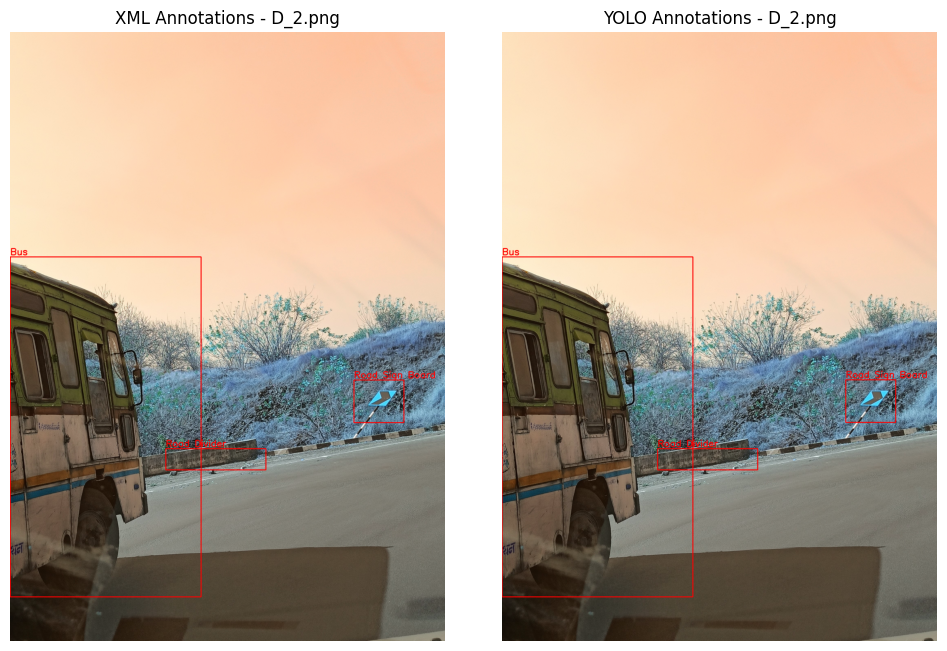

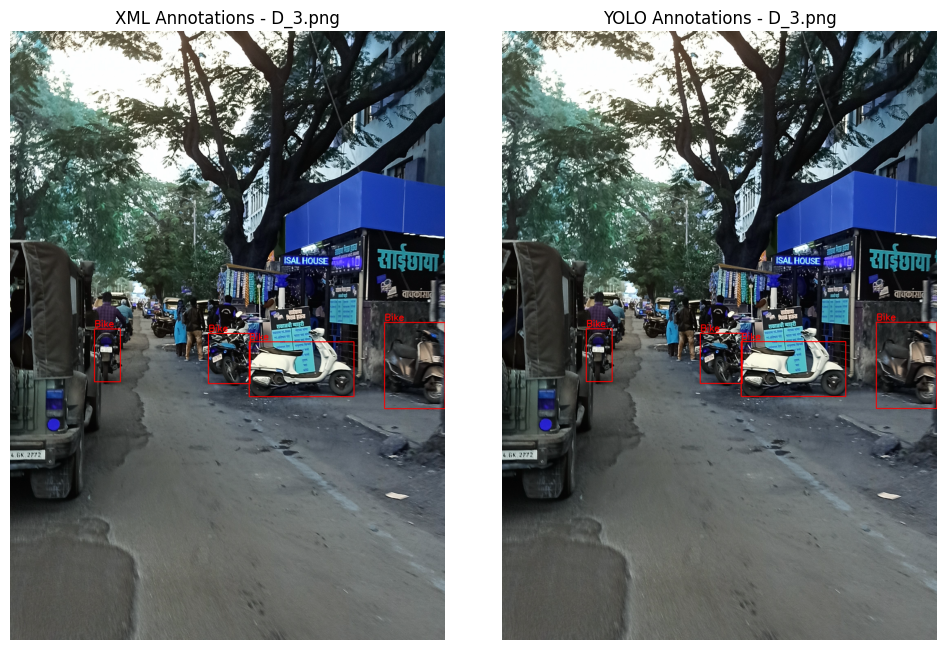

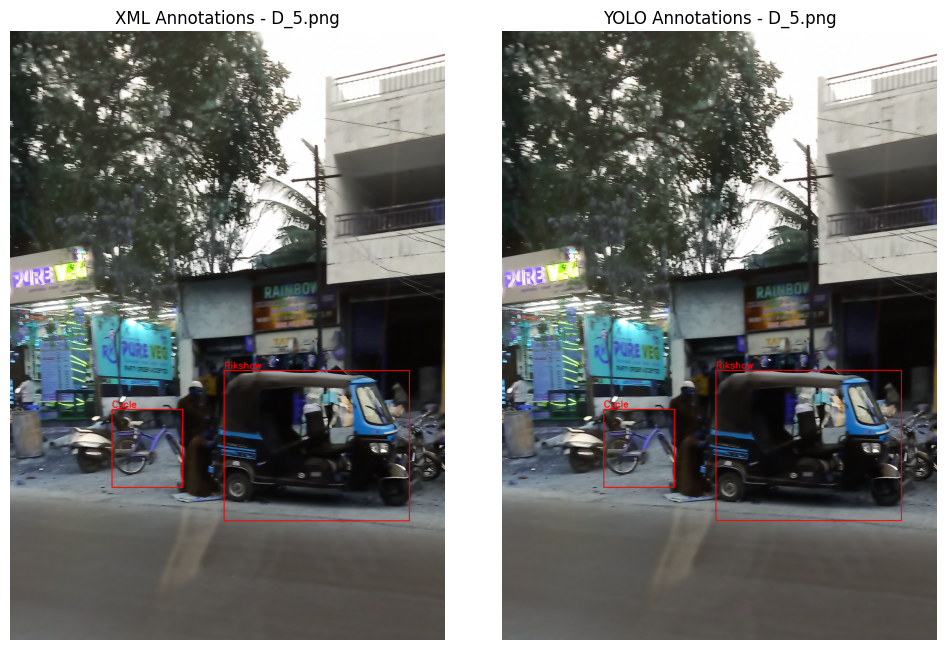

In [ ]:
for (img_file, xml_file, txt_file) in zip(img_files, xml_files, txt_files):
    img_file_path = os.path.join("img", img_file)
    xml_file_path = os.path.join("xml", xml_file)
    txt_file_path = os.path.join("out", txt_file)
    
    voc_image = visualize_voc_annotations(img_file_path, xml_file_path)
    yolo_image = visualize_yolo_annotations(img_file_path, txt_file_path)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
    fig.tight_layout()

    axes[0].imshow(voc_image)
    axes[0].set_title(f'XML Annotations - {img_file}')
    axes[0].axis('off')

    axes[1].imshow(yolo_image)
    axes[1].set_title(f'YOLO Annotations - {img_file}')
    axes[1].axis('off')

    plt.plot()